# Notebook 6: Outcrop trace of a plane

The outcrop trace of a plane is the intersection of the plane with the ground surface. The plane outcrops wherever the elevation of the plane is the same than the elevation of the ground.

The ENU to SDP coordinate transformation of notebook 5 is useful to solve this problem. If we know the orientation of the plane (strike and dip), the ENU coordinates of a location where the point outcrops, and the elevation of the terrain as a digital elevation model (DEM, a regular grid of points with elevation), we can determine the outcrop trace of the plane. The solution is quite simple: The plane outcrops wherever the P coordinate of the ground is equal to the P coordinate of the plane at the outcrop location. 

Let"s call the coordinate of the plane at the outcrop location $P_1$, and that of a point in the DEM grid $P_{gp}$. The difference between these two is:

$$D = P_1 - P_{gp}$$

At each point of the DEM grid, we can calculate and store this difference. The plane will outcrop wherever $D$ is zero. Therefore, to draw the outcrop trace of the plane, we just need to contour the D value of zero on the grid.

## Python function

Function [outcrop_trace](../functions/outcrop_trace.py) takes as input the strike and dip of a plane, the ENU coordinates of a location where the point outcrops (p1), and the ENU coordinates of the grid points of a DEM model (XG, YG, ZG), and returns the value of $D$ at the grid points.

## Application:

Let"s use this function to compute the outcrop trace of the lower and upper coal seams in the map below [(Bennison, 1990](https://link.springer.com/book/10.1007/978-1-4615-9630-1)):

<img src="../figures/three_point.png" alt="three_point" width="500" style="display: block; margin: 0 auto"/><br><br>

From notebook 4, the strike and dip of the plane (RHR) is 106/7, and the ENU coordinates of the seams at borehole A are:

<div align="center">

| Borehole | Lower seam | Upper seam |
| -------- | ---------- | ---------- |
| A | [393, 2374, 550] | [393, 2374, 950] |

</div>

In addition, the file nb6_cont.txt in the data directory, contains the ENU coordinates of points along the elevation contours. We"ll use these to reconstruct the DEM grid.

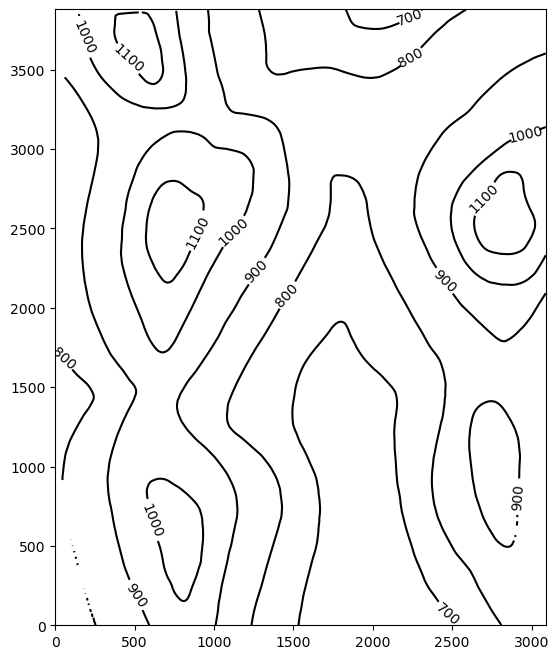

In [1]:
# from the contours reconstruct DEM and draw the topographic map

# import required libraries
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

# read contours from text file
path = os.path.join("..", "data", "nb6_cont.txt") # a safe path to the file
contours = np.loadtxt(path)

# extract E, N and U coordinates
x_topo = contours[:,0] # 1st column E
y_topo = contours[:,1] # 2nd column N
z_topo = contours[:,2] # 3rd column U

# make a grid covering the map and with points at 10 m intervals
x_points = np.arange(0, 3100, 10) # points along E
y_points = np.arange(0, 3890, 10) # points along N
XG, YG = np.meshgrid(x_points, y_points) # E and N coordinates of points in grid

# interpolate data to make DEM grid, we try the cubic method
ZG = si.griddata((x_topo, y_topo), z_topo, (XG, YG), method="cubic")

# contour gridded data
fig, ax = plt.subplots(figsize=(10,8)) # make figure
c_levels = np.array([700, 800, 900, 1000, 1100]) # contour levels
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors=["black"]) # contour grid
ax.clabel(cs)

# make axes equal
ax.axis("scaled")

# show the plot
plt.show()

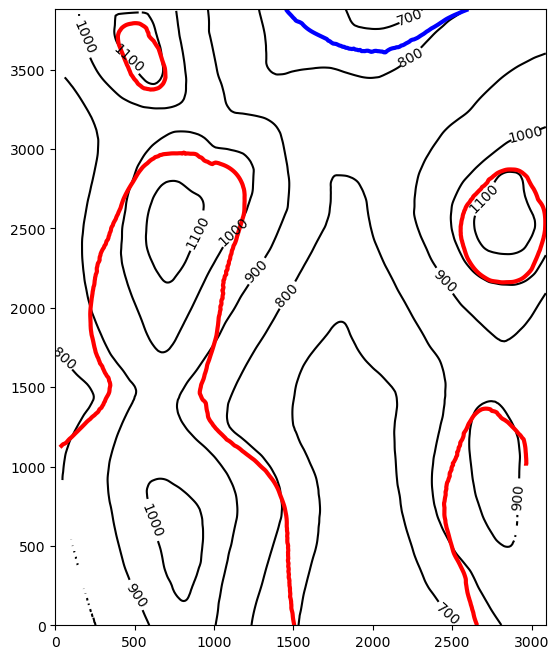

In [2]:
# calculate and plot the outcrop trace of the lower and upper seams

# this makes visible our functions folder
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import outcrop_trace function
from outcrop_trace import outcrop_trace

# orientation of seams
strike, dip = np.radians([106, 7]) 

# E,N, U coordinates of seams at borehole A
point1_lower = np.array([393, 2374, 550]) # lower seam
point1_upper = np.array([393, 2374, 950]) # lower seam

# calculate DG for lower and upper seams
DG_lower = outcrop_trace(strike,dip,point1_lower,XG,YG,ZG)
DG_upper = outcrop_trace(strike,dip,point1_upper,XG,YG,ZG)

# plot topo map
fig, ax = plt.subplots(figsize=(10,8)) # make figure
c_levels = np.array([700, 800, 900, 1000, 1100]) # contour levels
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors=["black"]) # contour grid
ax.clabel(cs)

# plot outcrop traces of seams by contouring the 0 value of DG
c_levels = 0 
ax.contour(XG,YG,DG_lower,levels=c_levels,colors=["blue"],linewidths=3)
ax.contour(XG,YG,DG_upper,levels=c_levels,colors=["red"],linewidths=3)

# make axes equal
ax.axis("scaled")

# show the plot
plt.show()

The blue line is the outcrop trace of the lower seam, and the red line is the outcrop trace of the upper seam.  

Bennison (1990) suggests another interesting problem: Indicate the areas where the upper seam is at a depth less than 150 m below the surface. Basically, these areas are bounded by the outcrop trace of the seam, and the trace of the seam 150 m below the surface. Try solving this problem.